# Análise de Dados Cyclistic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Listando os nomes dos arquivos
arquivos = ['2021-10-Cyclistic - Part 1.xlsx', '2021-10-Cyclistic - Part 2.xlsx', '2021-11-Cyclistic.xlsx', 
            '2021-12-Cyclistic.xlsx', '2022-01-Cyclistic.xlsx', '2022-02-Cyclistic.xlsx', '2022-03-Cyclistic.xlsx',
           '2022-04-Cyclistic.xlsx', '2022-05-Cyclistic.xlsx', '2022-06-Cyclistic.xlsx', '2022-07-Cyclistic - Part 1.xlsx',
           '2022-07-Cyclistic - Part 2.xlsx', '2022-08-Cyclistic.xlsx', '2022-09-Cyclistic.xlsx']

In [4]:
# Carregando os arquivos em Loop
dataframes = []

for arquivo in arquivos:
    df = pd.read_excel(arquivo)
    dataframes.append(df)

In [5]:
# Concatenando
dataset = pd.concat(dataframes, ignore_index=True)

## Análise Exploratória

In [6]:
# Shape
dataset.shape

(5828176, 15)

In [6]:
dataset.head()

,ride_id,rideable_type,started_at,ended_at,duracao_passeio,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,00:03:08,6,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,4.188919e+16,-8.763850e+15,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,00:01:37,5,NaN,NaN,NaN,NaN,4.193000e+01,-8.770000e+01,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,00:07:47,7,NaN,NaN,NaN,NaN,4.192000e+01,-8.770000e+01,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,00:01:15,7,NaN,NaN,NaN,NaN,4.192000e+01,-8.769000e+01,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,00:08:16,4,NaN,NaN,NaN,NaN,4.189000e+01,-8.771000e+01,41.89,-87.69,member


In [7]:
# Amostra dos Dados
dataset.sample(10)

,ride_id,rideable_type,started_at,ended_at,duracao_passeio,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3881479,50250F724703F9EB,classic_bike,2022-07-20 09:12:01,2022-07-20 09:13:30,00:01:29,4,Wacker Dr & Washington St,KA1503000072,Canal St & Monroe St,13056,4.188314e+15,-8.763724e+15,4.188169e+06,-8.763953e+06,member
5702299,9F3BBE4843002E46,electric_bike,2022-09-10 01:37:43,2022-09-10 02:06:34,00:28:51,7,Columbus Dr & Randolph St,13263,Desplaines St & Jackson Blvd,15539,4.188456e+07,-8.761940e+15,4.187812e+15,-8.764395e+15,casual
1766901,08DB9B483480D64C,classic_bike,2022-04-15 13:00:16,2022-04-15 13:05:13,00:04:57,6,LaSalle St & Illinois St,13430,Milwaukee Ave & Grand Ave,13033,4.189076e+07,-8.763170e+07,4.189158e+07,-8.764838e+07,member
1312315,F005FACF24610457,classic_bike,2022-01-12 10:35:29,2022-01-12 10:58:21,00:22:52,4,Clark St & Wrightwood Ave,TA1305000014,Fairbanks St & Superior St,18003,4.192955e+07,-8.764312e+07,4.189575e+07,-8.762010e+07,member
3959225,F5F66717F35162C9,electric_bike,2022-07-07 17:56:13,2022-07-07 18:01:47,00:05:34,5,NaN,NaN,NaN,NaN,4.190000e+01,-8.763000e+01,4.192000e+01,-8.763000e+01,member
5772703,19C1F3840C7CE43B,electric_bike,2022-09-21 00:29:23,2022-09-21 00:53:34,00:24:11,4,NaN,NaN,Wilton Ave & Belmont Ave,TA1307000134,4.186000e+01,-8.764000e+01,4.194023e+16,-8.765294e+15,casual
2471807,79DFA5C8BC470894,classic_bike,2022-05-29 23:57:42,2022-05-30 00:19:42,00:22:00,1,Adler Planetarium,13431,Fairbanks Ct & Grand Ave,TA1305000003,4.186610e+07,-8.760727e+07,4.189185e+15,-8.762058e+15,casual
2349657,2E76FA90394DE4CF,electric_bike,2022-05-22 15:17:39,2022-05-22 16:42:40,01:25:01,1,Yates Blvd & 93rd St,20237,NaN,NaN,4.172616e+15,-8.756639e+15,4.190000e+01,-8.763000e+01,casual
2529770,7119400AA19174E5,classic_bike,2022-05-13 18:36:55,2022-05-13 18:43:56,00:07:01,6,Broadway & Cornelia Ave,13278,Clarendon Ave & Gordon Ter,13379,4.194553e+07,-8.764644e+07,4.195787e+15,-8.764951e+15,member
2525078,A82F5E0BD7ABCC7D,electric_bike,2022-05-22 19:48:15,2022-05-22 20:08:15,00:20:00,1,DuSable Lake Shore Dr & Monroe St,13300,State St & Kinzie St,13050,4.188102e+07,-8.761675e+15,4.188938e+16,-8.762708e+15,casual


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828176 entries, 0 to 5828175
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   duracao_passeio     object        
 5   dia_da_semana       int64         
 6   start_station_name  object        
 7   start_station_id    object        
 8   end_station_name    object        
 9   end_station_id      object        
 10  start_lat           float64       
 11  start_lng           float64       
 12  end_lat             float64       
 13  end_lng             float64       
 14  member_casual       object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 667.0+ MB


In [8]:
# Resumo dados Categoricos
dataset.describe(include = object)

,ride_id,rideable_type,duracao_passeio,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5828176,5828176,5828176,4933153,4933153,4869969,4869969,5828176
unique,5828176,3,22647,1591,1302,1609,1309,2
top,620BC6107255BF4C,electric_bike,00:05:23,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2895208,6430,75985,75985,76510,76510,3426921


In [18]:
# Resumo dados Númericos
dataset.describe()

,dia_da_semana,start_lat,start_lng,end_lat,end_lng
count,5.828176e+06,5.828176e+06,5.828176e+06,5.822332e+06,5.822332e+06
mean,4.116598e+00,4.761239e+15,-2.189301e+15,2.489603e+15,-1.198269e+15
std,2.019638e+00,1.236679e+16,3.783400e+15,9.196120e+15,2.989503e+15
min,1.000000e+00,4.164000e+01,-8.783325e+15,4.139000e+01,-8.777476e+15
25%,2.000000e+00,4.185680e+07,-8.766786e+14,4.196325e+06,-8.762769e+10
50%,4.000000e+00,4.193222e+07,-8.765975e+07,4.190322e+07,-8.764182e+07
75%,6.000000e+00,4.193669e+14,-8.759986e+07,4.188872e+10,-8.765114e+06
max,7.000000e+00,4.206483e+16,-8.752000e+01,4.206477e+16,-8.730000e+01


In [19]:
# Verificando valores Nulos
dataset.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
duracao_passeio            0
dia_da_semana              0
start_station_name    895023
start_station_id      895023
end_station_name      958207
end_station_id        958207
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
dtype: int64

## Visualizando Distribuição das Variáveis Qualitativas

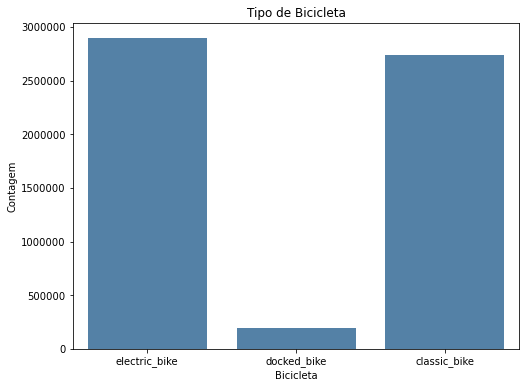

In [11]:
# Distribuição de rideable_type
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'rideable_type', color = 'Steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Tipo de Bicicleta')
plt.xlabel('Bicicleta')
plt.ylabel('Contagem')
plt.show()

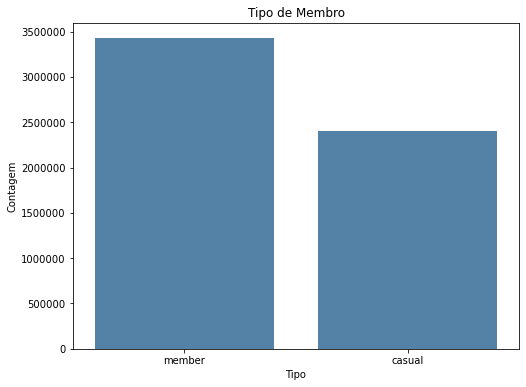

In [12]:
# Distribuição de member_casual
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'member_casual', color = 'Steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Tipo de Membro')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

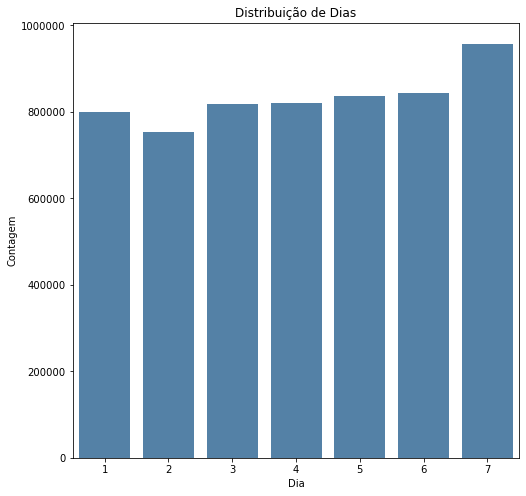

In [13]:
# Distribuição de dia_da_semana 
plt.figure(figsize = (8, 8))
sns.countplot(data = dataset, x = 'dia_da_semana', color = 'Steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribuição de Dias')
plt.xlabel('Dia')
plt.ylabel('Contagem')
plt.show()

## Engenharia de Atributos

In [20]:
# Criando a coluna em minutos
# Calculando a duração de passeio e transformando em minutos
dataset['DiferencaMinutos'] = ((dataset['ended_at'] - dataset['started_at']).dt.total_seconds() / 60)

In [21]:
# Drop da coluna duracao_passeio, ela está com formato diferente.
dataset = dataset.drop('duracao_passeio', axis=1)

In [22]:
dataset['DiferencaMinutos'] = round(dataset['DiferencaMinutos'], 2)

In [23]:
dataset.rename(columns={'DiferencaMinutos': 'Duracao_Passeio(Minutos)'}, inplace = True)

In [24]:
dataset.sample(5)

,ride_id,rideable_type,started_at,ended_at,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duracao_Passeio(Minutos)
3356278,15BB9F8222DAEF79,electric_bike,2022-06-22 14:44:17,2022-06-22 14:47:04,4,Throop St & Taylor St,13139,NaN,NaN,4.186886e+15,-8.765907e+08,4.187000e+01,-8.767000e+01,casual,2.78
2190811,CE07BFC76296BB20,electric_bike,2022-05-17 15:27:36,2022-05-17 15:36:06,3,Clifton Ave & Armitage Ave,TA1307000163,Clifton Ave & Armitage Ave,TA1307000163,4.191826e+15,-8.765710e+15,4.191822e+07,-8.765694e+07,member,8.50
927833,83A00DACC388EFB9,electric_bike,2021-11-05 14:07:45,2021-11-05 14:14:03,6,Ogden Ave & Race Ave,13194,Kingsbury St & Kinzie St,KA1503000043,4.189178e+15,-8.765884e+15,4.188969e+16,-8.763861e+15,member,6.30
1812403,337C7DF2B408E5F9,classic_bike,2022-04-29 17:03:31,2022-04-29 17:04:40,6,Ellis Ave & 58th St,TA1309000011,Ellis Ave & 58th St,TA1309000011,4.178875e+07,-8.760133e+07,4.178875e+07,-8.760133e+07,member,1.15
5759340,8AB4E7325F2BF94D,electric_bike,2022-09-05 23:04:22,2022-09-05 23:07:22,2,NaN,NaN,DuSable Lake Shore Dr & Belmont Ave,TA1309000049,4.194000e+01,-8.764000e+01,4.194078e+07,-8.763919e+07,member,3.00


In [25]:
# Criando coluna apenas com os meses de Started_at
dataset['month'] = dataset['started_at'].dt.month

In [26]:
dataset.sample(5)

,ride_id,rideable_type,started_at,ended_at,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duracao_Passeio(Minutos),month
1196038,A3CE7FF863EA3876,electric_bike,2021-12-02 11:32:45,2021-12-02 11:36:30,5,Bissell St & Armitage Ave,13059,Larrabee St & Armitage Ave,TA1309000006,4.191792e+08,-8.765210e+15,4.191810e+15,-8.764383e+15,member,3.75,12
4233327,7F56623066BD8D6E,electric_bike,2022-07-10 14:15:20,2022-07-10 14:26:08,1,Aberdeen St & Jackson Blvd,13157,Clark St & Ida B Wells Dr,TA1305000009,4.187772e+08,-8.765490e+15,4.187593e+11,-8.763058e+11,casual,10.80,7
222964,B1BD69765DDDBF5E,classic_bike,2021-10-09 14:17:30,2021-10-09 14:22:57,7,Rush St & Cedar St,KA1504000133,Clark St & North Ave,13128,4.190231e+12,-8.762769e+10,4.191197e+07,-8.763194e+07,member,5.45,10
563318,DE99F64C4DF552C5,classic_bike,2021-10-27 17:58:10,2021-10-27 18:08:53,4,State St & Randolph St,TA1305000029,Ritchie Ct & Banks St,KA1504000134,4.188462e+15,-8.762783e+15,4.190687e+07,-8.762622e+07,member,10.72,10
2728289,964BDCE578D40BDC,electric_bike,2022-05-27 11:01:58,2022-05-27 11:09:09,6,NaN,NaN,NaN,NaN,4.179000e+01,-8.760000e+01,4.180000e+01,-8.759000e+01,member,7.18,5


## Limpeza e Tratamento dos Dados

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828176 entries, 0 to 5828175
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ride_id                   object        
 1   rideable_type             object        
 2   started_at                datetime64[ns]
 3   ended_at                  datetime64[ns]
 4   dia_da_semana             int64         
 5   start_station_name        object        
 6   start_station_id          object        
 7   end_station_name          object        
 8   end_station_id            object        
 9   start_lat                 float64       
 10  start_lng                 float64       
 11  end_lat                   float64       
 12  end_lng                   float64       
 13  member_casual             object        
 14  Duracao_Passeio(Minutos)  float64       
 15  month                     int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)


In [28]:
# Extração as colunas do tipo object 
string_columns = dataset.select_dtypes(include = 'object').columns.tolist()

In [29]:
string_columns

['ride_id',
 'rideable_type',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'member_casual']

In [30]:
# Função que converte para string
def func_convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [31]:
func_convert_to_string(dataset, string_columns)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828176 entries, 0 to 5828175
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ride_id                   string        
 1   rideable_type             string        
 2   started_at                datetime64[ns]
 3   ended_at                  datetime64[ns]
 4   dia_da_semana             int64         
 5   start_station_name        string        
 6   start_station_id          string        
 7   end_station_name          string        
 8   end_station_id            string        
 9   start_lat                 float64       
 10  start_lng                 float64       
 11  end_lat                   float64       
 12  end_lng                   float64       
 13  member_casual             string        
 14  Duracao_Passeio(Minutos)  float64       
 15  month                     int64         
dtypes: datetime64[ns](2), float64(5), int64(2), string(7)


In [33]:
# Função para calcular % de valores ausentes
def valores_ausentes_coluna(df):
    
    # Total de valores ausentes
    mis_val = df.isnull().sum()

    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)

    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes

    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    # Print 
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns

In [34]:
valores_ausentes_coluna(dataset)

O dataset tem 16 colunas.
Encontrado: 6 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
end_station_name,958207,16.44,string
end_station_id,958207,16.44,string
start_station_name,895023,15.36,string
start_station_id,895023,15.36,string
end_lat,5844,0.10,float64
end_lng,5844,0.10,float64


In [35]:
# Preencher valor NA do tipo categórico
def func_fix_missing_value(df, col, value):
    
    count = df[col].isna().sum()
    
    df[col] = df[col].fillna(value)
    
    if type(value) == 'str':
        print(f"{count} valores ausentes na coluna {col} foram substituídos por '{value}'.")
    else:
        print(f'{count} valores ausentes na coluna {col} foram substituídos por {value}.')

In [36]:
func_fix_missing_value(dataset, 'end_station_name',  'unknown')
func_fix_missing_value(dataset, 'end_station_id',  'unknown')
func_fix_missing_value(dataset, 'start_station_name',  'unknown')
func_fix_missing_value(dataset, 'start_station_id',  'unknown')

958207 valores ausentes na coluna end_station_name foram substituídos por unknown.
958207 valores ausentes na coluna end_station_id foram substituídos por unknown.
895023 valores ausentes na coluna start_station_name foram substituídos por unknown.
895023 valores ausentes na coluna start_station_id foram substituídos por unknown.


In [37]:
valores_ausentes_coluna(dataset)

O dataset tem 16 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
end_lat,5844,0.1,float64
end_lng,5844,0.1,float64


In [38]:
# Drop de linhas com valores ausentes
def func_drop_linhas_com_na(df):
    
    old = df.shape[0]
    
    df.dropna(inplace = True)
    
    new = df.shape[0]
    
    count = old - new
    
    print(f'{count} linhas contendo valores ausentes foram descartadas.')

In [39]:
func_drop_linhas_com_na(dataset)

5844 linhas contendo valores ausentes foram descartadas.


In [40]:
valores_ausentes_coluna(dataset)

O dataset tem 16 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [41]:
# Resumo dados categoricos
dataset.describe(include = 'string')

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5822332,5822332,5822332,5822332,5822332,5822332,5822332
unique,5822332,3,1592,1303,1610,1310,2
top,620BC6107255BF4C,electric_bike,unknown,unknown,unknown,unknown,member
freq,1,2895208,895023,895023,952363,952363,3426260


In [42]:
# Resumo dados númericos
dataset.describe()

,dia_da_semana,start_lat,start_lng,end_lat,end_lng,Duracao_Passeio(Minutos),month
count,5.822332e+06,5.822332e+06,5.822332e+06,5.822332e+06,5.822332e+06,5.822332e+06,5.822332e+06
mean,4.116613e+00,4.764275e+15,-2.190625e+15,2.489603e+15,-1.198269e+15,1.679326e+01,7.218191e+00
std,2.019440e+00,1.237020e+16,3.784171e+15,9.196120e+15,2.989503e+15,6.390612e+01,2.579211e+00
min,1.000000e+00,4.164000e+01,-8.783325e+15,4.139000e+01,-8.777476e+15,0.000000e+00,1.000000e+00
25%,2.000000e+00,4.185680e+07,-8.766786e+14,4.196325e+06,-8.762769e+10,5.930000e+00,5.000000e+00
50%,4.000000e+00,4.193222e+07,-8.765975e+07,4.190322e+07,-8.764182e+07,1.048000e+01,7.000000e+00
75%,6.000000e+00,4.193669e+14,-8.759986e+07,4.188872e+10,-8.765114e+06,1.882000e+01,9.000000e+00
max,7.000000e+00,4.206483e+16,-8.752000e+01,4.206477e+16,-8.730000e+01,4.070502e+04,1.200000e+01


In [43]:
# Usamos o método duplicated() para criar uma série de valores booleanos indicando duplicatas
duplicatas = dataset.duplicated()

In [44]:
# Exibe linhas que estão duplicadas
dataset[duplicatas]

,ride_id,rideable_type,started_at,ended_at,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duracao_Passeio(Minutos),month


### Análise de Outliers

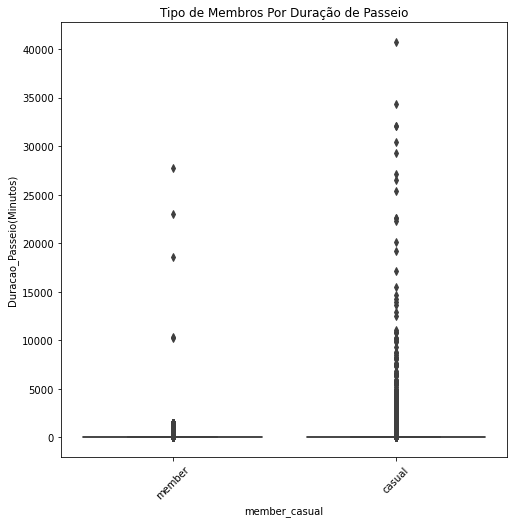

In [53]:
# Boxplots
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'member_casual', y = 'Duracao_Passeio(Minutos)', data=dataset)
plt.xticks(rotation = 45)
plt.title('Tipo de Membros Por Duração de Passeio')
plt.show()

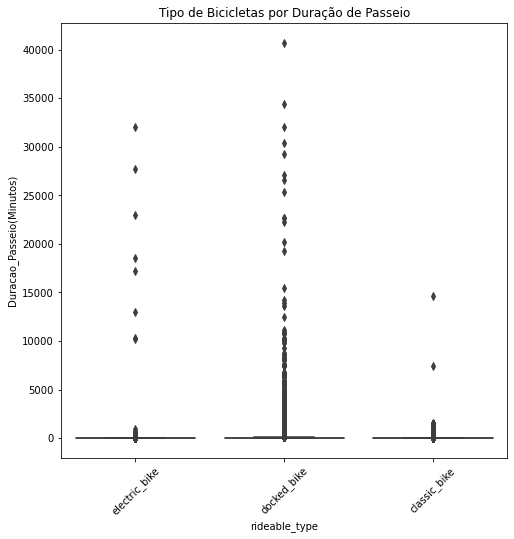

In [54]:
# Boxplots
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'rideable_type', y = 'Duracao_Passeio(Minutos)', data=dataset)
plt.xticks(rotation = 45)
plt.title('Tipo de Bicicletas por Duração de Passeio')
plt.show()

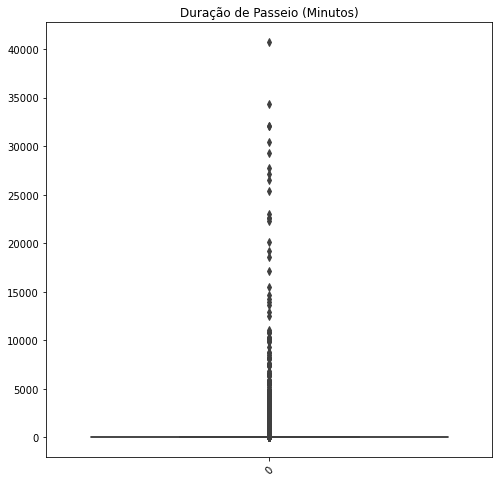

In [55]:
# Boxplots
plt.figure(figsize = (8, 8))
sns.boxplot(data = dataset['Duracao_Passeio(Minutos)'])
plt.xticks(rotation = 45)
plt.title('Duração de Passeio (Minutos)')
plt.show()

O gráfico de Boxplot ajuda na identificação de Outliers, nesse caso percebemos que há Outliers nas coluna de Duração de Passeio 

## Tratando Outliers

In [58]:
# Calculando o IQR para a coluna de duração de passeio
Q1 = dataset['Duracao_Passeio(Minutos)'].quantile(0.25)
Q3 = dataset['Duracao_Passeio(Minutos)'].quantile(0.75)
IQR = Q3 - Q1
IQR

12.89

In [59]:
# Definindo os limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [63]:
# Calculando a mediana da coluna de duração de passeio
mediana_duração = dataset['Duracao_Passeio(Minutos)'].median()
mediana_duração

10.48

In [64]:
# Substituindo outliers pela mediana
dataset['Duracao_Passeio(Minutos)'] = np.where(
    (dataset['Duracao_Passeio(Minutos)'] < limite_inferior) | (dataset['Duracao_Passeio(Minutos)'] > limite_superior),
    mediana_duração,
    dataset['Duracao_Passeio(Minutos)']
)

Usamos a Mediana para tratar outliers porque ela é menos sensível a valores extremos em comparação com a média. A média é fortemente influenciada pelos valores extremos, especialmente em conjuntos de dados pequenos, o que pode levar a distorções significativas nos resultados.

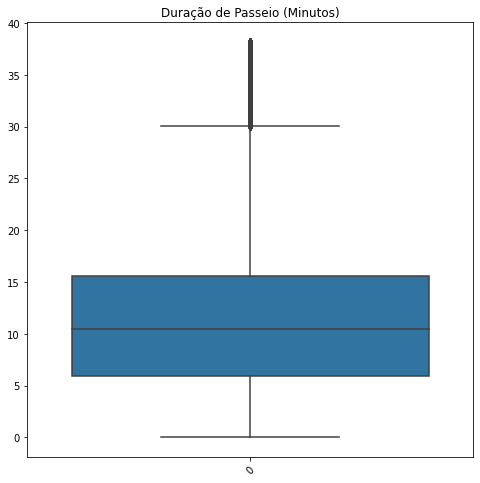

In [65]:
# Boxplots
plt.figure(figsize = (8, 8))
sns.boxplot(data = dataset['Duracao_Passeio(Minutos)'])
plt.xticks(rotation = 45)
plt.title('Duração de Passeio (Minutos)')
plt.show()

## Enriquecimento dos Dados

In [66]:
# Carregando dados com a média de temperatura de Chicago por mês
mean_temp = pd.read_excel('mean_temp.xlsx')

In [67]:
mean_temp.head(12)

,month,mean_temp
0,1,-3.8
1,2,-3.1
2,3,1.6
3,4,7.8
4,5,14.5
5,6,20.7
6,7,23.8
7,8,23.2
8,9,19.6
9,10,12.7


In [68]:
# Mesclando os dados da média de temperatura no dataset pela coluna mês
dataset = dataset.merge(mean_temp, on='month')

In [69]:
dataset.sample(5)

,ride_id,rideable_type,started_at,ended_at,dia_da_semana,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duracao_Passeio(Minutos),month,mean_temp
3679559,2AA6A8FF77977B27,docked_bike,2022-07-07 20:08:21,2022-07-07 20:50:50,5,Racine Ave & Fullerton Ave,TA1306000026,Oakley Ave & Irving Park Rd,KA1504000158,4.192556e+07,-8.765840e+07,41954341.00,-8768608.00,casual,10.48,7,23.8
1992876,527BD73A7D579C1F,electric_bike,2022-04-15 10:36:58,2022-04-15 10:46:43,6,Milwaukee Ave & Wabansia Ave,13243,Wood St & Chicago Ave,637,4.191268e+16,-8.768140e+07,41895634.00,-87672069.00,member,9.75,4,7.8
2330405,C069860094DD99A2,classic_bike,2022-05-08 13:52:06,2022-05-08 14:13:56,1,Desplaines St & Kinzie St,TA1306000003,DuSable Lake Shore Dr & Monroe St,13300,4.188872e+10,-8.764445e+11,41880958.00,-87616743.00,casual,21.83,5,14.5
1009665,52249C42F7C672E8,electric_bike,2021-12-31 11:59:29,2021-12-31 12:14:06,6,Manor Ave & Leland Ave,KA1504000127,Southport Ave & Waveland Ave,13235,4.196584e+08,-8.770086e+15,4194815.00,-8766394.00,casual,14.62,12,-0.5
2972171,E7EDBEAAC580E642,electric_bike,2022-06-17 13:23:23,2022-06-17 13:29:27,6,Paulina St & 18th St,TA1307000159,unknown,unknown,4.185788e+15,-8.766868e+08,41.86,-87.65,member,6.07,6,20.7


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822332 entries, 0 to 5822331
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ride_id                   string        
 1   rideable_type             string        
 2   started_at                datetime64[ns]
 3   ended_at                  datetime64[ns]
 4   dia_da_semana             int64         
 5   start_station_name        string        
 6   start_station_id          string        
 7   end_station_name          string        
 8   end_station_id            string        
 9   start_lat                 float64       
 10  start_lng                 float64       
 11  end_lat                   float64       
 12  end_lng                   float64       
 13  member_casual             string        
 14  Duracao_Passeio(Minutos)  float64       
 15  month                     int64         
 16  mean_temp                 float64       
dtypes: datet

## Análise Estatística

In [ ]:
# Média de duração de uso por membro
media_passeio_por_membro = dataset.groupby('member_casual')['Duracao_Passeio(Minutos)'].mean()
# Mediana de duração de uso por membro
mediana_passeio_por_membro = dataset.groupby('member_casual')['Duracao_Passeio(Minutos)'].median()

print('Média de Duração de passeio por tipo de Membro:', media_passeio_por_membro, '\n\n')
print('Mediana de Duração de passeio por tipo de Membro:', mediana_passeio_por_membro)

Média de Duração de passeio por tipo de Membro: member_casual
casual    13.293764
member    10.812167
Name: Duracao_Passeio(Minutos), dtype: float64 


Mediana de Duração de passeio por tipo de Membro: member_casual
casual    10.48
member     8.88
Name: Duracao_Passeio(Minutos), dtype: float64


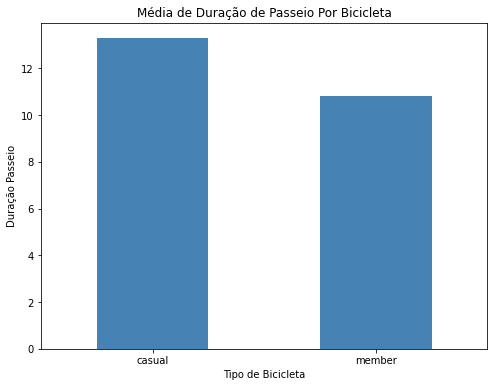

In [73]:
# Média de Duração de Passeio Por Bicicleta
plt.figure(figsize = (8, 6))
media_passeio_por_membro.plot(kind='bar', color = 'steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Média de Duração de Passeio Por Bicicleta')
plt.xlabel('Tipo de Bicicleta')
plt.ylabel('Duração Passeio')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Média de duração de uso por bike
media_passeio_por_bike = dataset.groupby('rideable_type')['Duracao_Passeio(Minutos)'].mean()
# Mediana de duração de uso por membro
mediana_passeio_por_bike = dataset.groupby('member_casual')['Duracao_Passeio(Minutos)'].median()

print('Média de Duração de passeio por tipo de Bicicleta:', media_passeio_por_bike, '\n\n')
print('Mediana de Duração de passeio por tipo de Bicicleta:', mediana_passeio_por_bike)

Média de Duração de passeio por tipo de Bicicleta: rideable_type
classic_bike     12.224101
docked_bike      16.316377
electric_bike    11.169986
Name: Duracao_Passeio(Minutos), dtype: float64 


Mediana de Duração de passeio por tipo de Bicicleta: rideable_type
classic_bike     10.48
docked_bike      11.42
electric_bike     9.55
Name: Duracao_Passeio(Minutos), dtype: float64


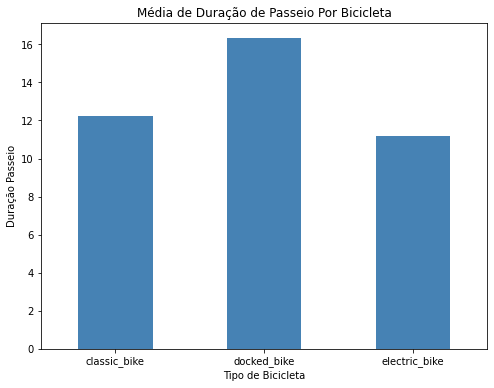

In [ ]:
# Média de Duração de Passeio Por Bicicleta
plt.figure(figsize = (8, 6))
media_passeio_por_bike.plot(kind='bar', color = 'steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Média de Duração de Passeio Por Bicicleta')
plt.xlabel('Tipo de Bicicleta')
plt.ylabel('Duração Passeio')
plt.xticks(rotation=0)
plt.show()

In [78]:
# Quantidade de Utilização de bicilceta docked_bike por tipo de membro
docked_bike = dataset[dataset['rideable_type'] == 'docked_bike']
docked_bike = docked_bike.groupby('member_casual').size()
docked_bike

member_casual
casual    189924
dtype: int64

In [205]:
# Verificando o maximo de duração de passeio por tipo de Bike
maximo_passeio_por_bike = dataset.groupby('rideable_type')['Duracao_Passeio(Minutos)'].max()
# Tranformando minutos em Dias
maximo_passeio_por_bike = (maximo_passeio_por_bike)
maximo_passeio_por_bike

rideable_type
classic_bike     38.15
docked_bike      38.15
electric_bike    38.15
Name: Duracao_Passeio(Minutos), dtype: float64

In [94]:
# Media e Mediana de Duração de Passeio
media = round(dataset['Duracao_Passeio(Minutos)'].mean(),2)
mediana = dataset['Duracao_Passeio(Minutos)'].median()

print('A Média de Duração de passeio é:', media)
print('A Mediana de Duração de passeio é:', mediana)

A Média de Duração de passeio é: 11.83
A Mediana de Duração de passeio é: 10.48


### Associação Entre Variáveis Quantitativas

In [95]:
# Calculando a matriz de correlação apenas para variavéis quantitativas "PERSON"
correlation_matriz = dataset[['dia_da_semana', 'Duracao_Passeio(Minutos)', 'mean_temp', 'month']].corr()

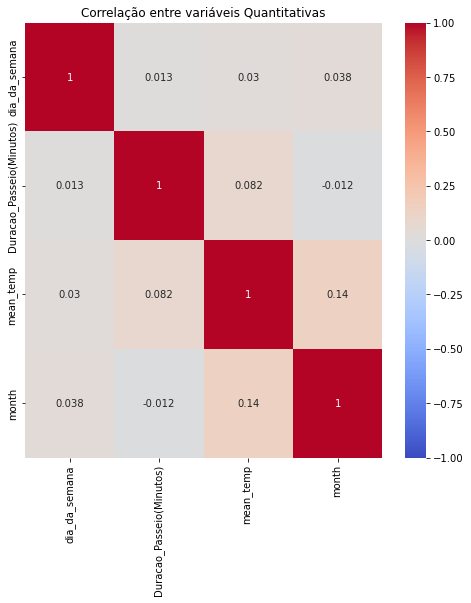

In [96]:
#Visualizando a matriz de correlação com um heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matriz, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis Quantitativas')
plt.show()

<Figure size 576x432 with 0 Axes>

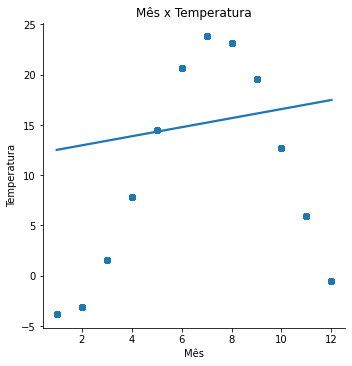

In [97]:
# Mês x Temperatura
plt.figure(figsize = (8, 6))
sns.lmplot(x='month', y='mean_temp', data=dataset, ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Mês x Temperatura')
plt.xlabel('Mês')
plt.ylabel('Temperatura')
plt.show()

Uma correlação de 0.14 entre o mês e a temperatura média, sugere uma correlação positiva muito fraca entre essas duas variáveis. A correlação varia de -1 a 1.                                       
No caso, 0.14 indica que há uma tendência muito leve de aumento ou diminuição da temperatura média com o passar dos meses, mas essa relação não é muito forte.

É importante notar que correlação não implica causalidade. Ou seja, mesmo que haja uma correlação, não podemos afirmar que uma variável causa a outra. Pode haver outros fatores envolvidos.

### Associação Entre Variáveis Qualitativas

In [99]:
# Tabela de Contigência
tabela_contigencia = pd.crosstab(dataset['rideable_type'], dataset['member_casual'])

In [100]:
print(tabela_contigencia)

member_casual   casual   member
rideable_type                  
classic_bike    938804  1798396
docked_bike     189924        0
electric_bike  1267344  1627864


### Teste do Qui Quadrado (X²)

O Teste do Qui-quadrado (chi-quadrado) é uma técnica estatística que é usada para determinar se há uma associação significativa entre duas variáveis categóricas em um conjunto de dados.

Hipótese Nula (H0): A hipótese nula afirma que não há associação significativa entre as duas variáveis categóricas no conjunto de dados. Em outras palavras, as duas variáveis são independentes uma da outra.

Hipótese Alternativa (H1 ou Ha): A hipótese alternativa é a negação da hipótese nula. Ela sugere que há uma associação significativa entre as duas variáveis categóricas no conjunto de dados. Em termos simples, as duas variáveis não são independentes.

Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um nível de significância (geralmente 0,05), podemos rejeitar a hipótese nula de que as variáveis são independentes.

In [101]:
# Carrega a função chi2_cotingency
from scipy.stats import chi2_contingency

In [102]:
# Aplica a função chi2_cotingency
chi2, p, _, _ = chi2_contingency(tabela_contigencia)

In [103]:
print(f"Valor-p do teste Qui_quadrado: {p:.4f}")

Valor-p do teste Qui_quadrado: 0.0000


### Coeficiente de Contingência de Cramér (V)

 Mede a força da associação entre duas variáveis nominais. Seu valor varia de 0 (sem associação) a 1 (associação perfeita). É baseado no valor do qui-quadrado.

In [104]:
# Calculando o Coeficiente de Contingência de Cramér
n = tabela_contigencia.sum().sum()
print(n)
phi2 = chi2 / n
print(phi2)
r, k = tabela_contigencia.shape
print(r, k)
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Coeficiente de Cramér V: {cramers_v:.4f}")

5822332
0.057177670547994705
3 2
Coeficiente de Cramér V: 0.2391


## Visualização dos Dados

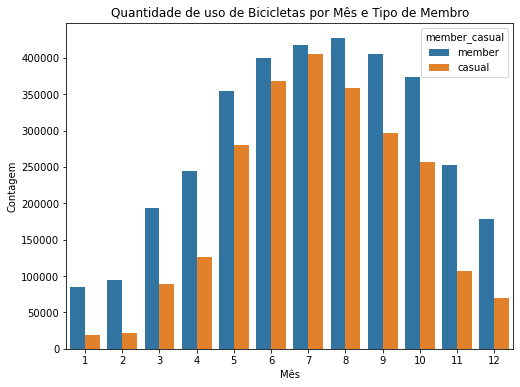

In [105]:
# Quantidade de uso de Bicicletas por Mês e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'month', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quantidade de uso de Bicicletas por Mês e Tipo de Membro')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.show()

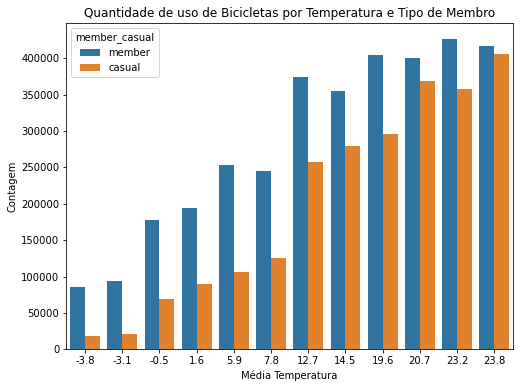

In [106]:
# Quantidade de uso de Bicicletas por Média Temperatura e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'mean_temp', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quantidade de uso de Bicicletas por Temperatura e Tipo de Membro')
plt.xlabel('Média Temperatura')
plt.ylabel('Contagem')
plt.show()

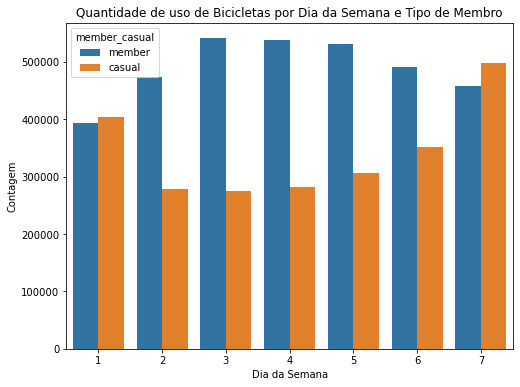

In [107]:
# Quantidade de uso de Bicicletas por Dia da Semana e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'dia_da_semana', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quantidade de uso de Bicicletas por Dia da Semana e Tipo de Membro')
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem')
plt.show()

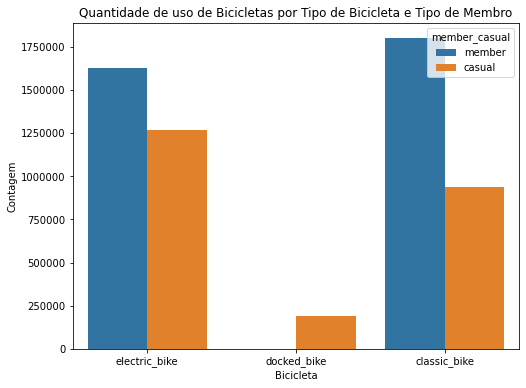

In [108]:
# Quantidade de uso de Bicicletas por Tipo de Bicicleta e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'rideable_type', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quantidade de uso de Bicicletas por Tipo de Bicicleta e Tipo de Membro')
plt.xlabel('Bicicleta')
plt.ylabel('Contagem')
plt.show()

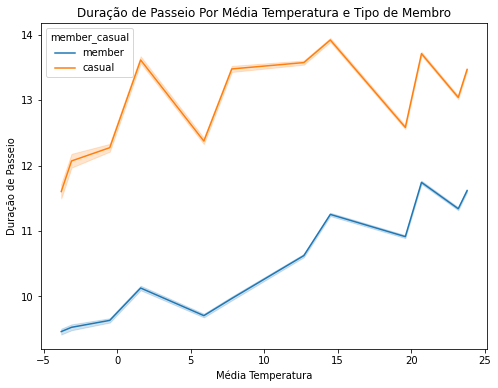

In [109]:
# Duração de Passeio Por Média Temperatura e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.lineplot (data = dataset, x = 'mean_temp', y = 'Duracao_Passeio(Minutos)', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Duração de Passeio Por Média Temperatura e Tipo de Membro')
plt.xlabel('Média Temperatura')
plt.ylabel('Duração de Passeio')
plt.show()

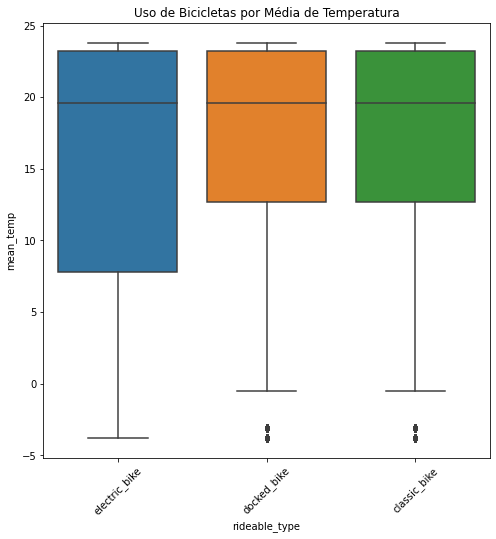

In [114]:
# Uso de Bicicleta por média de temperatura
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'rideable_type', y = 'mean_temp', data=dataset)
plt.xticks(rotation = 45)
plt.title('Uso de Bicicletas por Média de Temperatura')
plt.show()

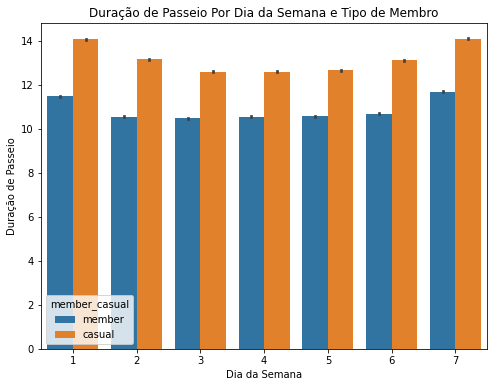

In [113]:
# Duração de Passeio Por Dia da Semana e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.barplot(data = dataset, x = 'dia_da_semana', y = 'Duracao_Passeio(Minutos)', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quantidade Duração de Passeio Por Dia da Semana e Tipo de Membro')
plt.xlabel('Dia da Semana')
plt.ylabel('Duração de Passeio')
plt.show()

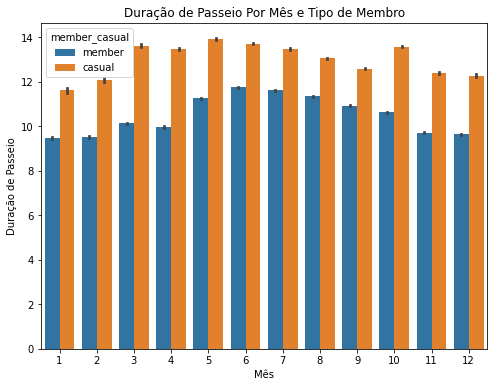

In [137]:
# Duração de Passeio Por Mês e Tipo de Membro
plt.figure(figsize = (8, 6))
sns.barplot(data = dataset, x = 'month', y = 'Duracao_Passeio(Minutos)', hue='member_casual')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Duração de Passeio Por Mês e Tipo de Membro')
plt.xlabel('Mês')
plt.ylabel('Duração de Passeio')
plt.show()

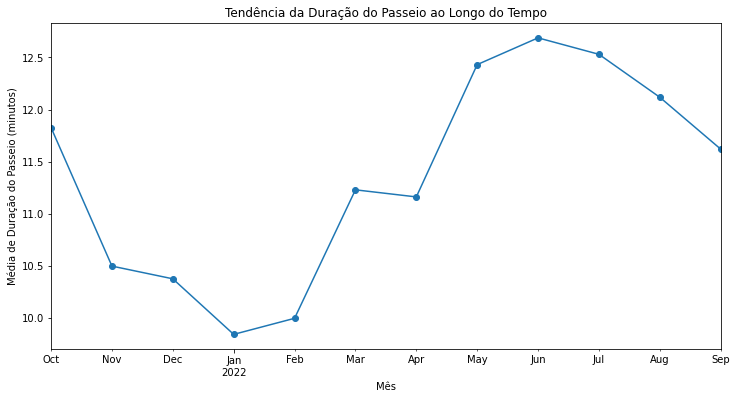

In [133]:
# Media de Duração de Passeio por Mês

# Agrupando por mês e calculando a média da duração do passeio
media_por_mes = dataset.groupby(dataset['started_at'].dt.to_period("M"))['Duracao_Passeio(Minutos)'].mean()

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))
media_por_mes.plot(marker='o')
plt.title('Média da Duração do Passeio ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Média de Duração do Passeio (minutos)')
plt.show()

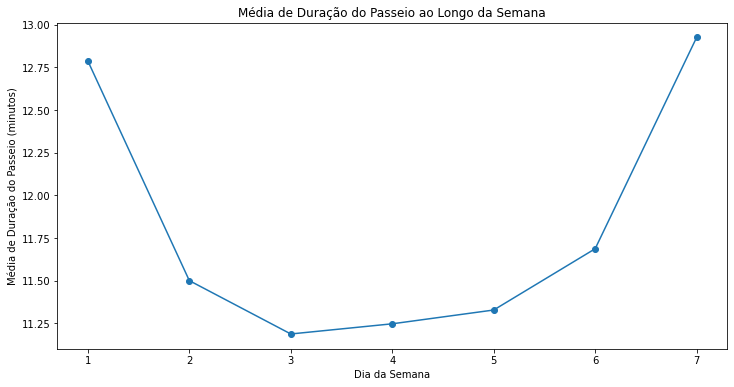

In [138]:
# Media de Duração de Passeio por Dia da Semana

# Agrupando por mês e calculando a média da duração do passeio
media_por_mes = dataset.groupby(dataset['dia_da_semana'])['Duracao_Passeio(Minutos)'].mean()

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))
media_por_mes.plot(marker='o')
plt.title('Média de Duração do Passeio ao Longo da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Duração do Passeio (minutos)')
plt.show()

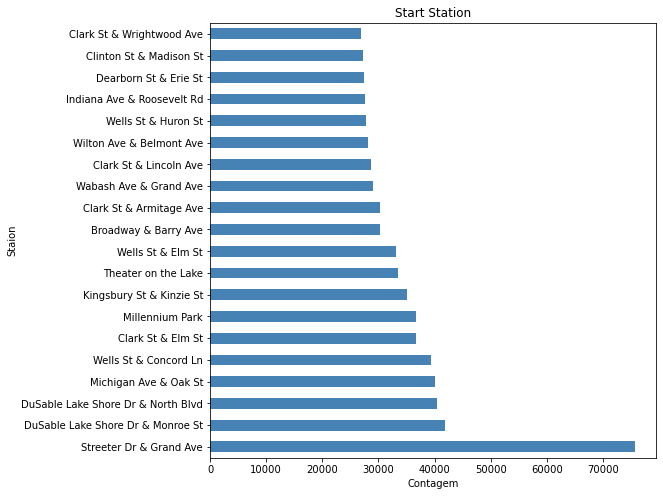

In [148]:
# Filtrando os dados para excluir locais marcados como "unknown"
dados_locais_start = dataset[dataset['start_station_name'] != 'unknown']

# Agrupando por start_station e colocando de ordem crescente
start_station = dados_locais_start.groupby('start_station_name').size().sort_values( ascending=False)

# 20 Primeiras Start Stations
plt.figure(figsize = (8, 8))
start_station.head(20).plot.barh(color = 'Steelblue')
plt.title('Start Station')
plt.xlabel('Contagem')
plt.ylabel('Staion')
plt.show()

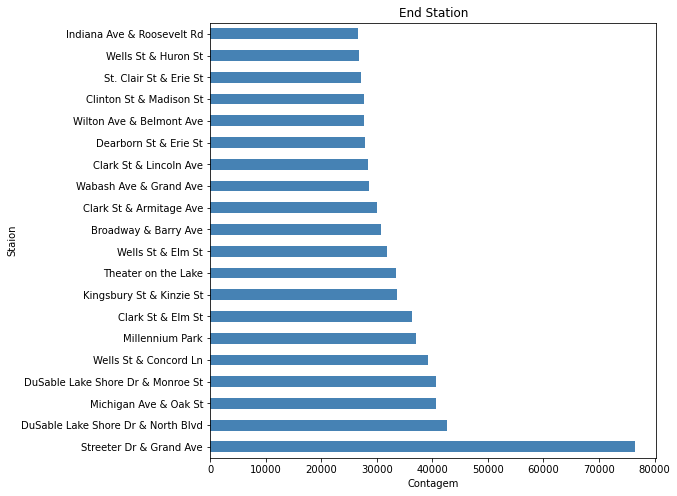

In [149]:
# Filtrando os dados para excluir locais marcados como "unknown"
dados_locais_end = dataset[dataset['end_station_name'] != 'unknown']

# Agrupando por start_station e colocando de ordem crescente
end_station = dados_locais_end.groupby('end_station_name').size().sort_values( ascending=False)

# 20 Primeiras End Stations

plt.figure(figsize = (8, 8))
end_station.head(20).plot.barh(color = 'Steelblue')
plt.title('End Station')
plt.xlabel('Contagem')
plt.ylabel('Staion')
plt.show()

## Respostas - Problema de Negócio

Três perguntas nortearão o futuro programa de marketing:

1 - Como os membros anuais e os ciclistas casuais usam bicicletas da Cyclistic de forma diferente?


- Resposta: A Análise de Dados sugere que há diferença no uso das bicicletas por tipo de membros.

  Membros Anuais utilizam as bicicletas em maior quantidade principalmente as bicicletas clássicas e elétricas, seu uso está concentrado principalmente nos dias úteis da semana.
  
  Membros Casuais utilizam as bicicletas por maior média de tempo, sua frequência de uso aumenta aos finais de semana, outro fator relevante é que as bicicletas de carga são alugadas somente por membros casuais.
          


2 - Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?

- Resposta: Temos alguns indicadores relevantes na utilização das bicicletas por membros casuais: Tem a maior média de duração de uso das bicicletas em relação aos membros anuais, as bicicletas de carga foram alugadas apenas por membros casuais, o aumento do aluguel das bicicletas aos finais de semana, com base nessas informações a Cyclistic poderia realizar um plano de ação para  fidelizar esses clientes casuais.



3 - Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

- Resposta: Identificamos alguns pontos que podem influenciar a campanha de mídia digital:

  As 5 principais estações de retirada e entrega de bicicleta com maior quantidade de aluguel são similares.
  
  O período que há maior quantidade de aluguel de bicicletas tem a média da temperatura acima de 12.7 °, o aluguel de bicicleta aumenta nos meses de maio a outubro.
  
  Realizar promoções de uso para aluguel de bicicleta de carga.
  
  Realizar promoções para uso das bicicletas aos finais de semana.
  
  Desconto na utilização das bicicletas com duração acima de 30 minutos.

  A  mídia digital poderia focar nessas pontos para influenciar os passageiros casuais a se tornarem membros.